# Tarea UD02. Introducción desarrollo de aplicaciones de IA

# Descargar el dataset

El dataset que utilizaremos se ha obtenido a partir de dos datasets publicados en la siguiente web: 

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

La información detallada de dicho dataset la puedes encontrar en esta referencia:
 

*  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In [370]:
#@title
# Libraries to handle data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import io
from statistics import mean
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# URL: https://drive.google.com/file/d/1ODVR1V3kKMhhGg925Rm_sMdF53AVi9s0
!gdown --id 1ODVR1V3kKMhhGg925Rm_sMdF53AVi9s0

## Carga del fichero en Python
df_train = pd.read_csv('winequality.csv', delimiter=',')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ODVR1V3kKMhhGg925Rm_sMdF53AVi9s0
To: /content/winequality.csv
100% 551k/551k [00:00<00:00, 111MB/s]


# Ejercicio 1. Identifica el número de ocurrencias de vino tinto (Red) y blanco (White)



1.   Muestra el número de ocurrencias de vino tinto y vino blanco. 




In [371]:
num_red_wines = df_train[df_train["type"] == "Red"].shape[0]
num_white_wines = df_train[df_train["type"] == "White"].shape[0]
print("Number of red wine:", num_red_wines)
print("Number of white wine:", num_white_wines)

Number of red wine: 1599
Number of white wine: 4898


2.   Muestra estos datos utilizando un diagrama de barras.





<BarContainer object of 2 artists>

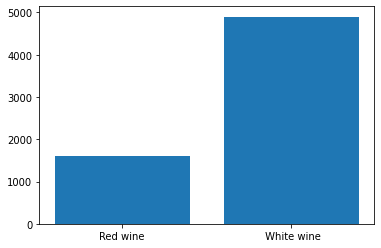

In [372]:
plt.bar(["Red wine", " White wine"], [num_red_wines, num_white_wines])

3.   Muestra estos datos utilizando un diagrama de secciones. 

([<matplotlib.patches.Wedge at 0x7fcb52806e50>,
 [Text(0.7872560399476721, 0.7682629286682453, 'Red wine'),
  Text(-0.7872560759126548, -0.7682628918141292, 'White wine')])

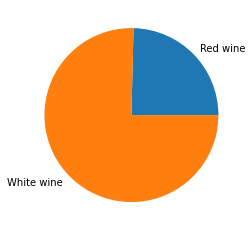

In [373]:
plt.pie([num_red_wines, num_white_wines], labels=["Red wine", "White wine"])

# Ejercicio 2. Mostrar información del dataset

1.   Mostrar las primeras 10 filas del dataset. 




In [374]:
df_train.head(10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,date,origin
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,bajo,baja,Red,NaN,NaN
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,medio,baja,Red,NaN,NaN
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,medio,baja,Red,NaN,Ribera del Duero
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,medio,media,Red,NaN,NaN
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,bajo,baja,Red,NaN,NaN
5,5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,bajo,baja,Red,NaN,NaN
6,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,bajo,baja,Red,NaN,Ribera del Duero
7,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,medio,alta,Red,NaN,Ribera del Duero
8,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,bajo,alta,Red,NaN,Ribera del Duero
9,9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,alto,baja,Red,NaN,NaN


2.   Mostrar información básica del dataframe con las columnas que lo componen, número valores no nulos, número valores nulos y tipo de datos de la columna. 


In [375]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   object 
 13  type                  6497 non-null   object 
 14  date                  1556 non-null   object 
 15  origin               

3.   Mostrar información básica de cada columna (numero ocurrencias, media, desviación típica, valor mínimo, el valor máximo, y los límites de los cuartiles 25%, 50% y 75%)



In [376]:
df_train.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000


4.   Mostrar una lista con el nombre de columnas que son categóricas

In [377]:
# Almacenar columnas categoricas
categorical_columns = df_train.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['alcohol', 'quality', 'type', 'date', 'origin']


# Ejercicio 3. Unificar las ocurrencias de vino tinto y blanco

Crea un dataframe en el que iguales las ocurrencias con el que más tiene y otro dataframe donde las iguales con el que menor tiene.

El dataframe con más ocurrencias se deberá llamar **df_train_may** y el de menos **df_train_min**.

Continuaremos trabajando con **df_train_may** después de este ejercicio. Puedes copiarlo a una variable que se llame **df_train**

In [378]:
# Almacenar cada clase
df_may = df_train[df_train["type"] == "Red"]
df_min = df_train[df_train["type"] == "White"]

In [379]:
# Upsample hacia vino blanco (el que tiene mas ocurrencias)
df_majority_upsampled = resample(df_may, 
                                 n_samples=len(df_min),
                                 replace=True,      
                                 random_state=42) 

df_train = pd.concat([df_min, df_majority_upsampled])

In [380]:
# Downsample hacia vino tinto (el que tiene menos ocurrencias)
df_majority_downsampled = resample(df_min, 
                                 n_samples=len(df_may),
                                 replace=True,      
                                 random_state=42) 

df_train_min = pd.concat([df_may, df_majority_downsampled])

## Mostrar la información del dataset otra vez

Comprueba de la forma que consideres que el dataset tiene las mismas ocurrencias de vino blanco y tinto

In [381]:
print(f"(Upsampled) Number of red wine: {len( df_train[df_train['type'] == 'Red'])}")
print(f"(Upsampled) Number of white wine: {len( df_train[df_train['type'] == 'White'])}")

print(f"(Downsampled) Number of red wine: {len( df_train_min[df_train_min['type'] == 'Red'])}")
print(f"(Downsampled) Number of white wine: {len( df_train_min[df_train_min['type'] == 'White'])}")

(Upsampled) Number of red wine: 4898
(Upsampled) Number of white wine: 4898
(Downsampled) Number of red wine: 1599
(Downsampled) Number of white wine: 1599


# Ejercicio 4. Eliminar columna innecesaria

Elimina las columnas: 


*   Unnamed: 0
*   Density



In [382]:
df_train.pop("Unnamed: 0")
df_train.pop("density")

1599    1.00100
1600    0.99400
1601    0.99510
1602    0.99560
1603    0.99560
         ...   
444     0.99340
1593    0.99651
362     0.99920
122     0.99800
1211    0.99570
Name: density, Length: 9796, dtype: float64

# Ejercicio 5. Eliminar nulos

Identifica en el dataset que columnas tienen más del 30% de sus datos nulos y eliminalas

In [383]:
'''
inplace - Modificar el dataframe en lugar de crear uno nuevo
threshint - Requerir al menos X valores nulos'''
df_train.dropna(axis="columns", inplace=True, thresh=0.7*len(df_train))

In [384]:
df_train.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,type
6384,6.9,0.25,0.29,2.4,0.038,28.0,76.0,3.01,0.36,muy alto,alta,White
2228,5.8,0.31,0.33,1.2,0.036,23.0,99.0,3.18,0.60,alto,media,White
2163,6.8,0.51,0.30,4.2,0.066,38.0,165.0,3.20,0.42,bajo,baja,White
920,9.6,0.41,0.37,2.3,0.091,10.0,23.0,3.24,0.56,alto,baja,Red
3701,6.2,0.34,0.30,11.1,0.047,28.0,237.0,3.18,0.49,bajo,baja,White


# Ejercicio 6. Transformar variables categóricas a numéricas

Debes transformar todas las variables categóricas a numéricas.


1.   Obten una lista con todas las variables categóricas




In [385]:
# Buscar donde dtypes == object
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)

print("Categorical columns:", categorical_columns)

Categorical columns: ['alcohol', 'quality', 'type']


2.   Convierte en numérica cada una de las anteriores variables

In [386]:
def onehot_encode(df, column):
    for name in column:
      df = df.copy()
      dummies = pd.get_dummies(df[name], prefix=name) 

      df = pd.concat([df, dummies], axis=1)
      df = df.drop(name, axis=1)         
    return df
    

df_train = onehot_encode(df_train, categorical_columns)
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol_alto,alcohol_bajo,alcohol_medio,alcohol_muy alto,quality_alta,quality_baja,quality_media,type_Red,type_White
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000
mean,7.577720,0.402407,0.302667,4.471427,0.066411,25.562066,92.228920,3.250052,0.575695,0.256942,0.273071,0.240098,0.229890,0.180686,0.399040,0.420274,0.500000,0.500000
std,1.541659,0.190336,0.165438,4.193698,0.041269,17.168102,59.686264,0.163806,0.170143,0.436969,0.445560,0.427165,0.420783,0.384777,0.489726,0.493628,0.500026,0.500026
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,2.720000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,0.260000,0.210000,1.900000,0.043000,12.000000,37.000000,3.140000,0.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,0.352500,0.300000,2.400000,0.059000,22.000000,90.000000,3.240000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,8.200000,0.530000,0.400000,5.900000,0.080000,35.000000,136.000000,3.360000,0.650000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,4.010000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Comprueba que todas las columnas son numéricas

In [387]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9796 entries, 1599 to 1211
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         9796 non-null   float64
 1   volatile acidity      9796 non-null   float64
 2   citric acid           9796 non-null   float64
 3   residual sugar        9796 non-null   float64
 4   chlorides             9796 non-null   float64
 5   free sulfur dioxide   9796 non-null   float64
 6   total sulfur dioxide  9796 non-null   float64
 7   pH                    9796 non-null   float64
 8   sulphates             9796 non-null   float64
 9   alcohol_alto          9796 non-null   uint8  
 10  alcohol_bajo          9796 non-null   uint8  
 11  alcohol_medio         9796 non-null   uint8  
 12  alcohol_muy alto      9796 non-null   uint8  
 13  quality_alta          9796 non-null   uint8  
 14  quality_baja          9796 non-null   uint8  
 15  quality_media     

## Unificar la variable tipo en una sola columna

Hemos transformado la variable categórica tipo (Red, White) a numérica, generando las columnas 'type_Red' y 'type_White'. Para la obtención del model queremos una única columna con valor 0 en caso de que sea 'white' y 1 en caso de ser 'red'.

**Notas**: 

*    Investiga el uso de la función loc de la clase DataFrame
*    Es posible que tengas que cambiar el tipo de dato de una columna, porque se ha vuelto categórica. Para transformar el tipo de dato puedes usar la función **astype** de DataFrame. Se utiliza de la siguiente forma. 

`df['nombreColumna'] = df['nombreColumna'].astype('float64')`




In [388]:
# Añadir columna 'type' y combinar 'type_Red' y 'type_White' segun sun valores dentro de 'type'
df_train.loc[:, 'type'] = np.where(df_train['type_Red']==1, 1, 
                                       np.where(df_train['type_White']==1, 0, np.nan))

df_train.pop('type_White')
df_train.pop('type_Red')

1599    0
1600    0
1601    0
1602    0
1603    0
       ..
444     1
1593    1
362     1
122     1
1211    1
Name: type_Red, Length: 9796, dtype: uint8

# Ejercicio 7. Normalización de variables

1.  Haz una copia del dataframe que estás utilizando 
2.  Normaliza la copia del dataframe

Como resultado deberás de tener dos dataframes, uno normalizado y otro sin normalizar. 


In [389]:
df_train_normalized = df_train

In [390]:
#si quiero normalizar un dataset completo
scaler = MinMaxScaler()                                                 
data_normalized = scaler.fit_transform(df_train)                        
df_train_normalized = pd.DataFrame(data_normalized, columns= df_train.columns)

In [391]:
df_train_normalized.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol_alto,alcohol_bajo,alcohol_medio,alcohol_muy alto,quality_alta,quality_baja,quality_media,type
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000
mean,0.312208,0.214938,0.182330,0.059378,0.095368,0.085285,0.198684,0.410893,0.199829,0.256942,0.273071,0.240098,0.229890,0.180686,0.399040,0.420274,0.500000
std,0.127410,0.126891,0.099661,0.064321,0.068553,0.059611,0.137526,0.126981,0.095586,0.436969,0.445560,0.427165,0.420783,0.384777,0.489726,0.493628,0.500026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.231405,0.120000,0.126506,0.019939,0.056478,0.038194,0.071429,0.325581,0.134831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.280992,0.181667,0.180723,0.027607,0.083056,0.072917,0.193548,0.403101,0.185393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.363636,0.300000,0.240964,0.081288,0.117940,0.118056,0.299539,0.496124,0.241573,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [392]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol_alto,alcohol_bajo,alcohol_medio,alcohol_muy alto,quality_alta,quality_baja,quality_media,type
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000
mean,7.577720,0.402407,0.302667,4.471427,0.066411,25.562066,92.228920,3.250052,0.575695,0.256942,0.273071,0.240098,0.229890,0.180686,0.399040,0.420274,0.500000
std,1.541659,0.190336,0.165438,4.193698,0.041269,17.168102,59.686264,0.163806,0.170143,0.436969,0.445560,0.427165,0.420783,0.384777,0.489726,0.493628,0.500026
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,2.720000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,0.260000,0.210000,1.900000,0.043000,12.000000,37.000000,3.140000,0.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.200000,0.352500,0.300000,2.400000,0.059000,22.000000,90.000000,3.240000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,8.200000,0.530000,0.400000,5.900000,0.080000,35.000000,136.000000,3.360000,0.650000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,4.010000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Tareas creación de modelos

## Ejercicio 1

Por cada uno de los algoritmos que se han explicado (regresión lineal, regresión logistica, SVM, Random Forest, y KNN):


*   Utilizando el dataframe sin normalizar, genera dos modelos diferentes por cada algoritmo explicado. Utiliza diferentes parámetros de configuración. 



**Separacion de columnas del dataset**


---


Separamos la variable dependiente del resto y la almacenamos en `df_train_y` el resto de columnas pasan a `df_train_x`.
Luego hacemos un split de todo el dataset en un 80% para entrenamiento, 20% para validacion. Tambien barajamos las filas controlando la semilla del radomizador con `random_state`. 

In [393]:
df_train_y = df_train['type']
df_train_x = df_train.drop('type', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, train_size=0.80, shuffle=True, random_state=1, stratify=df_train['type'])

### Regresion linear



**LinearRegression model**

In [394]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.8239701102761189


**Lasso model**
*   `alpha` e utiliza para controlar el término de regularización en algunos modelos lineales, como la Regresión Ridge y la Regresión Lasso. Cuanto mayor es el valor de alpha, mayor es la penalización aplicada a los coeficientes del modelo y, por tanto, el modelo se vuelve menos complejo y menos propenso a sobreajuste

In [395]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.8197913102299996


### Regresion logistica

**LogisticRegression**
* `max_iter` Numero maximo de iteraciones en el proceso de entrenamiento (defecto de 100 se quedaba corto para este dataset y arrojaba excepciones)


```
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
n_iter_i = _check_optimize_result(
```



In [396]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
score = model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.9785714285714285


### SVM


**LinearSVC**
* `c` El parámetro C controla la penalización aplicada a los errores durante el proceso de entrenamiento. Cuanto mayor es el valor de C, mayor es la penalización aplicada a los errores y, por tanto, el modelo se vuelve más propenso a sobreajuste.
* `loss` hinge o squared_hinge especifican la funcion utilizada para cuantificar la incertidumbre de la prediccion, cuanto mas cercano es a 0 mejor.


In [397]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=10, loss="hinge")
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model score:  0.8760204081632653


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**SVC**
* `kernel` El parámetro kernel especifica el tipo de kernel que se debe utilizar en el modelo SVM. Los kernels comunes incluyen el kernel lineal, el kernel polinómico y el kernel radial. Cada uno de estos kernels se comporta de manera diferente y puede ser más adecuado para ciertos tipos de datos.
* `degree` El parámetro degree se utiliza para especificar el grado del kernel polinómico cuando se utiliza el kernel polinómico.


In [398]:
from sklearn.svm import SVC

model = SVC(kernel="poly", coef0=1, C=5)
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.9249999999999999


### Random forest

In [399]:
from sklearn.ensemble import  RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)


Model score:  0.9974489795918368


In [400]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.9943877551020408


### KNN
KNeighborsClassifier
* `n_neighbors` El parámetro n_neighbors especifica el número de vecinos más cercanos que se deben considerar para predecir la clase de una instancia. Por defecto, este parámetro tiene el valor 5.

* `weights` Determina cómo se deben ponderar los vecinos más cercanos durante la predicción. Las opciones comunes incluyen "uniforme", que significa que todos los vecinos tienen el mismo peso, y "distance", que significa que los vecinos más cercanos tienen un mayor peso.

* `algorithm` especifica el algoritmo que se debe utilizar para encontrar los vecinos más cercanos. Las opciones comunes incluyen "brute force" y "kd-tree". Por defecto, este parámetro tiene el valor "auto".

* `p` Parámetro de potencia para la métrica de Minkowski. Cuando p = 1, esto es equivalente a usar manhattan_distance (l1) y euclidean_distance (l2) para p = 2. Para p arbitraria, se usa minkowski_distance (l_p).

In [401]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform',
                             algorithm='ball_tree',p=1)
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.9301020408163265


In [402]:
model = KNeighborsClassifier(n_neighbors=5,
                             weights='distance',
                             algorithm='kd_tree',p=1)
model.fit(X_train,y_train)
score = mean(cross_val_score(model, X_test,y_test, cv=5))

print('Model score: ', score)

Model score:  0.939795918367347


*   Utilizando el dataframe normalizado, genera dos modelos diferents por cada algoritmo explicado. Utilizando los mismos parámetros de configuración de antes. 



**Separacion de columnas del dataset normalizado**

---

Separamos la variable dependiente del resto y la almacenamos en `df_train_normalized_y` el resto de columnas pasan a `df_train_normalized_x`. Luego hacemos un split de todo el dataset en un 80% para entrenamiento, 20% para validacion. Tambien barajamos las filas controlando la semilla del radomizador con random_state. 

In [403]:
df_train_normalized_y = df_train_normalized['type']
df_train_normalized_x = df_train_normalized.drop('type', axis='columns')

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(df_train_normalized_x, df_train_normalized_y, train_size=0.8, shuffle=True, random_state=1, stratify=df_train_normalized['type'])

### Regresion linear (dataset normalizado)

**LinearRegression model**

In [404]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.8240970760088564


**Lasso model**
*   `alpha` e utiliza para controlar el término de regularización en algunos modelos lineales, como la Regresión Ridge y la Regresión Lasso. Cuanto mayor es el valor de alpha, mayor es la penalización aplicada a los coeficientes del modelo y, por tanto, el modelo se vuelve menos complejo y menos propenso a sobreajuste

In [405]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.8182511691849164


### Regresion logistica (dataset normalizado)

**LogisticRegression**
* `max_iter` Numero maximo de iteraciones en el proceso de entrenamiento (el valor por defecto no recorria el dataset completo y arrojaba excepciones)


```
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
n_iter_i = _check_optimize_result(
```



In [406]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.9836734693877551


### SVM (dataset normalizado)


**LinearSVC**
* `c` El parámetro C controla la penalización aplicada a los errores durante el proceso de entrenamiento. Cuanto mayor es el valor de C, mayor es la penalización aplicada a los errores y, por tanto, el modelo se vuelve más propenso a sobreajuste.
* `loss` hinge o squared_hinge especifican la funcion utilizada para cuantificar la incertidumbre de la prediccion, cuanto mas cercano es a 0 mejor.
* `max_iter` Numero maximo de iteraciones
 

In [407]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=7, max_iter=2000, loss="hinge")
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.9887755102040816


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

**SVC**
* `kernel` El parámetro kernel especifica el tipo de kernel que se debe utilizar en el modelo SVM. Los kernels comunes incluyen el kernel lineal, el kernel polinómico y el kernel radial. Cada uno de estos kernels se comporta de manera diferente y puede ser más adecuado para ciertos tipos de datos.
* `degree` El parámetro degree se utiliza para especificar el grado del kernel polinómico cuando se utiliza el kernel polinómico.


In [408]:
from sklearn.svm import SVC

model = SVC(kernel="poly", coef0=1, C=5)
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.9923469387755103


In [409]:
from sklearn.svm import SVC

model = SVC(kernel="linear", coef0=1, C=7)
model.fit(X_train_norm, y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.9887755102040816


### Random forest (dataset normalizado)

In [410]:
from sklearn.ensemble import  RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.996938775510204


In [411]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.9938775510204082


### KNN (dataset normalizado)
KNeighborsClassifier
* `n_neighbors` El parámetro n_neighbors especifica el número de vecinos más cercanos que se deben considerar para predecir la clase de una instancia. Por defecto, este parámetro tiene el valor 5.

* `weights` Determina cómo se deben ponderar los vecinos más cercanos durante la predicción. Las opciones comunes incluyen "uniforme", que significa que todos los vecinos tienen el mismo peso, y "distance", que significa que los vecinos más cercanos tienen un mayor peso.

* `algorithm` especifica el algoritmo que se debe utilizar para encontrar los vecinos más cercanos. Las opciones comunes incluyen "brute force" y "kd-tree". Por defecto, este parámetro tiene el valor "auto".

* `p` Parámetro de potencia para la métrica de Minkowski. Cuando p = 1, esto es equivalente a usar manhattan_distance (l1) y euclidean_distance (l2) para p = 2. Para p arbitraria, se usa minkowski_distance (l_p).

In [412]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform',
                             algorithm='ball_tree',p=1)
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.985204081632653


In [413]:
model = KNeighborsClassifier(n_neighbors=5,
                             weights='distance',
                             algorithm='kd_tree',p=1)
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.9862244897959184


## Ejercicio 2

Utilizando el dataframe **df_train_min** del Ejercicio 3, realiza un preprocesamiento de datos que permita generar un modelo con el mismo algoritmo y los mismos parámetros que el modelo con mejor resultado que has obtenido anteriormente. 

Empezaremos por cambiar la columna type (nuestra variable dependiente) a numerica

In [414]:
df_train_min['type'] = df_train_min['type'].map({'Red': 1.0, 'White': 0})

In [415]:
df_train_min.sample(5)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,date,origin
2661,1062,6.7,0.26,0.26,4.0,0.079,35.5,216.0,0.99560,3.31,0.68,bajo,baja,0.0,NaN,NaN
2426,827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,muy alto,alta,0.0,NaN,Ribera del Duero
4198,2599,6.9,0.32,0.27,16.0,0.034,58.0,185.0,0.99938,3.34,0.60,bajo,media,0.0,NaN,Rioja
5897,4298,5.6,0.26,0.00,10.2,0.038,13.0,111.0,0.99315,3.44,0.46,muy alto,media,0.0,NaN,NaN
4308,2709,7.8,0.25,0.34,13.7,0.044,66.0,184.0,0.99976,3.22,0.75,bajo,baja,0.0,NaN,Ribera del Duero


Para comprender mejor que columnas tienen un mayor impacto en el resultado (la clase de vino que es) podemos dibujar un mapa de calor.
El cual nos muestra que las columnas con mayor valor:

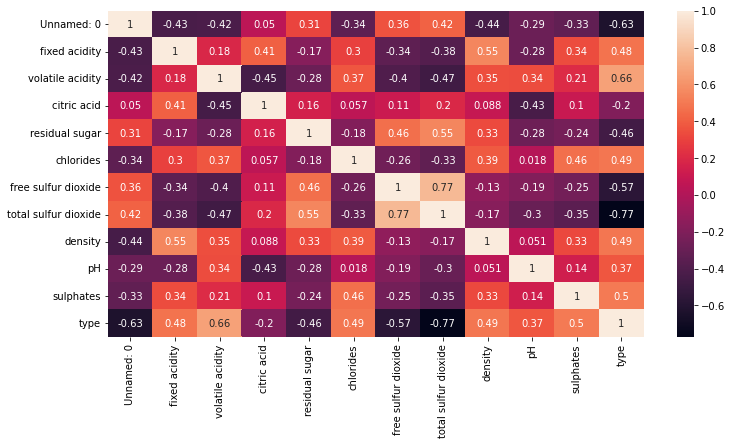

In [416]:
plt.figure(figsize = (12,6))
sns.heatmap(df_train_min.corr(), annot = True)
plt.show()

Continuamos por eliminar columnas desconocidas o con valores nulos

In [417]:
df_train_min.pop('Unnamed: 0')
df_train_min.dropna(axis="columns", inplace=True, thresh=0.7*len(df_train_min))

Eliminamos las columnas categoricas restantes

In [418]:
categorical_columns = list(df_train_min.dtypes[df_train_min.dtypes == 'object'].index)
print("Categorical columns:", categorical_columns)

Categorical columns: ['alcohol', 'quality']


In [419]:
df_train_min = onehot_encode(df_train_min, categorical_columns)

In [420]:
df_train_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 2348
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3198 non-null   float64
 1   volatile acidity      3198 non-null   float64
 2   citric acid           3198 non-null   float64
 3   residual sugar        3198 non-null   float64
 4   chlorides             3198 non-null   float64
 5   free sulfur dioxide   3198 non-null   float64
 6   total sulfur dioxide  3198 non-null   float64
 7   density               3198 non-null   float64
 8   pH                    3198 non-null   float64
 9   sulphates             3198 non-null   float64
 10  type                  3198 non-null   float64
 11  alcohol_alto          3198 non-null   uint8  
 12  alcohol_bajo          3198 non-null   uint8  
 13  alcohol_medio         3198 non-null   uint8  
 14  alcohol_muy alto      3198 non-null   uint8  
 15  quality_alta         

Normalizamos las columnas de manera que ninguna de ellas tenga mas peso que las otras, esto afectaria a la precision del modelo

In [421]:
scaler = MinMaxScaler()                                                 
data_normalized = scaler.fit_transform(df_train_min)                        
df_train_min = pd.DataFrame(data_normalized, columns= df_train_min.columns)

Empleando el modelo anterior 




In [422]:
from sklearn.ensemble import  RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_norm,y_train_norm)
score = mean(cross_val_score(model, X_test_norm, y_test_norm, cv=5))

print('Model score: ', score)

Model score:  0.996938775510204
